# Les théorèmes du bien-être à l'oeuvre

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import bisect

## Préférences

Les deux consommateurs ont des préférences:
$$ U_i(X_i,Y_i) = \log X_i + \alpha \log Y_i $$




On peut définir les fonctions d'utilité et de taux marginal de substitution.

In [2]:
def u(x,y,alpha):
    if x>0.0 and y>0.0 :
        return np.log(x) + alpha*np.log(y)
    else :
        return -10e3
def tms(x,y,alpha):
    if x>0.0:
        return (1.0/alpha)*(y/x)
    else :
        return 10e3


In [3]:
alphas = [0.5,2.0]

Ils ont des dotations des deux biens $(X^e_i,Y^e_i)$ qu'on représente dans une matrice (ligne = consommateur, colonne = biens)

In [4]:
edot = np.zeros((2,2))
edot[0,0] = 20
edot[1,1] = 20
edot[0,1] = 20 
edot[1,0] = 20 
edot

array([[20., 20.],
       [20., 20.]])

Pour trouver les allocations optimales, nous allons utiliser certains modules d'optimisation. 

In [5]:
from scipy.optimize import broyden2
from functools import partial

L'allocation optimale est définie par les conditions de premier ordre du lagragien. On peut les résumer à deux équations pour le choix de $x_1,y_1$. 

In [6]:
def echange(z,u2,xe,ye):
    x1,y1= z
    y2 = ye - y1 
    x2 = xe - x1 
    tms1 = tms(x1,y1,alphas[0])
    tms2 = tms(x2,y2,alphas[1])
    eqs = []
    eqs.append(tms1 - tms2)
    u2p = u(x2,y2,alphas[1]) 
    eqs.append(u2-u2p)
    return np.array(eqs)

In [11]:
xe = np.sum(edot[:,0])
ye = np.sum(edot[:,1])
u2bar  = u(edot[1,0],edot[1,1],alphas[1])
u2bar

8.987196820661973

In [14]:
u1bar  = u(edot[0,0],edot[0,1],alphas[0])
u1bar

4.4935984103309865

In [17]:
echange([0.35*xe,0.55*ye],u2bar,xe,ye)

array([ 2.7967033 , -0.05164323])

On peut maintenant trouver une allocation optimale au sens de Pareto. 

In [18]:
xe = np.sum(edot[:,0])
ye = np.sum(edot[:,1])
u2 = u(edot[1,0],edot[1,1],alphas[1])
z = np.array([xe*0.5,ye*0.5])
u2 = u(xe-z[0],ye-z[1],alphas[1])
f = partial(echange,u2=u2,xe=xe,ye=ye)


In [19]:
f([0.35*xe,0.55*ye])

array([ 2.7967033 , -0.05164323])

In [20]:
x1opt,y1opt = broyden2(f,xin=z,f_tol=1e-14)
x2opt = xe - x1opt 
y2opt = ye - y1opt
zopt = [x1opt,y1opt,x2opt,y2opt]
zopt

[27.741730362847584, 14.45355879418289, 12.258269637152416, 25.54644120581711]

In [21]:
f(zopt[:2])

array([6.66133815e-16, 3.55271368e-15])

On peut encapsuler cette procédure dans une fonction. 

In [22]:
def pareto(xe,ye,u2):
    z = np.array([xe*0.5,ye*0.5])
    f = partial(echange,u2=u2,xe=xe,ye=ye)
    x1opt,y1opt = broyden2(f,xin=z,f_tol=1e-14)
    x2opt = xe - x1opt 
    y2opt = ye - y1opt
    return [x1opt,y1opt,x2opt,y2opt]

On peut créer une procédure pour identifier le noyau et les allocations optimales. Enfin, on fera un graphique. 

In [23]:
def plot(edot):
    xe = np.sum(edot[:,0])
    ye = np.sum(edot[:,1])
    u2min = u(edot[1,0],edot[1,1],alphas[1])
    u2max = u(xe,ye,alphas[1])
    nq = 100
    u2s = np.linspace(u2min,u2max,nq)
    co = []
    u1 = u(edot[0,0],edot[0,1],alphas[0])
    for i,u2 in enumerate(u2s): 
        try: 
            opt = pareto(xe,ye,u2)
            uopt1 = u(opt[0],opt[1],alphas[0])
            uopt2 = u(opt[2],opt[3],alphas[1])
            if uopt1 >= u1 and uopt2>=u2min:
                co.append(opt[:2])
        except:
            continue
    # utility levels with endownments
    co = np.array(co)
    u1 = u(edot[0,0],edot[0,1],alphas[0])
    u2 = u(edot[1,0],edot[1,1],alphas[1])
    # indifference curve for 1
    x1 = np.linspace(edot[0,0],edot[0,0]*2.5,10)
    y1 = np.exp((1/alphas[0])*(u1 - np.log(x1)))
    # indifference curve for 2
    x2 = np.linspace(edot[1,0],edot[1,0]*0.25,10)
    y2 = np.exp((1/alphas[1])*(u2 - np.log(x2)))
    plt.xlabel('$x_1$')
    plt.ylabel('$y_1$')
    plt.plot(edot[0,0],edot[0,1],'bo',label='dotation') # against 1st x, 1st y
    plt.plot(x1,y1,label='indif 1') # against 1st x, 1st y
    plt.plot(co[:,0],co[:,1],label='contrat') # against 1st x, 1st y
    plt.axis([0,xe,0,ye])
    plt.twinx()
    plt.ylabel('$y_2$')
    plt.axis([0,xe,0,xe])
    plt.twiny()
    plt.xlabel('$x_2$')
    plt.plot(x2,y2,color='r',label='indif 2') # against 1st x, 1st y
    plt.axis([xe,0,ye,0])
    plt.show()
    return 


/Users/pmichaud/anaconda3/lib/python3.7/site-packages/scipy/optimize/nonlin.py:1040: RuntimeWarning: invalid value encountered in true_divide
  d = v / df_norm**2


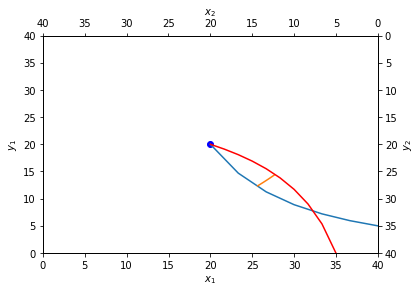

In [24]:
plot(edot)

# Équilibre de marché 

Les deux TMS sont égaux au ratio des prix dans un équilibre de marché (1er théorème du bien-être). Puisque 

In [25]:
tms(zopt[0],zopt[1],alphas[0]), tms(zopt[2],zopt[3],alphas[1])

(1.0420084547818587, 1.042008454781858)

Le rapport de prix $p=
\frac{p_Y}{p_X}$ est donc donné par: 

In [64]:
p = 1/tms(zopt[0],zopt[1],alphas[0])
p

0.9596851113932151

La contrainte budgétaire du consommateur 1 est donné par: 

$$ x_1 + p y_1 = x^e_1 + p y^e_1 $$

et donc 

$$ y^e_1 = \frac{x_1 + p y_1 - x^e_1}{p}  $$


À l'allocation optimale calculée, la dépense est de 

In [65]:
dep = zopt[0] + zopt[1]*p
dep

41.61259554427137

Est-ce qu'on peut atteindre cet équilibre de marché avec la dotation actuelle?

In [71]:
edot[0,1] ==(dep - edot[0,0])/p

False

Il faut trouver un transfer pour le faire (2e théorème du bien-être). Gardons mettons $x^e_1$ à 5

In [72]:
ye1_new = (dep - edot[0,0])/p
ye1_new

22.520507286911496

On doit donc faire un transfer de $y^e$

In [73]:
ty = ye1_new - edot[0,1] 
ty

2.5205072869114957

In [74]:
edot_n = edot.copy()
edot_n[0,1] = edot_n[0,1]+ty
edot_n[1,1] = edot_n[1,1]-ty
edot_n


array([[20.        , 22.52050729],
       [20.        , 17.47949271]])

Avec cette dotation, on obtient un équilibre de marché qui donne l'allocation trouvée. On peut vérifier les demandes à ce prix et ces dotations

In [79]:
eopt = np.zeros(4)
eopt[0] = (1/(1+alphas[0]))*(edot_n[0,0] + p*edot_n[0,1])
eopt[1] = (alphas[0]/(1+alphas[0]))*(edot_n[0,0] + p*edot_n[0,1])/p
eopt[2] = (1/(1+alphas[1]))*(edot_n[1,0] + p*edot_n[1,1])
eopt[3] = (alphas[1]/(1+alphas[1]))*(edot_n[1,0] + p*edot_n[1,1])/p
eopt


array([27.74173036, 14.45355879, 12.25826964, 25.54644121])

Alors que l'allocation optimale était: 

In [82]:
zopt

[27.741730362847584, 14.45355879418289, 12.258269637152416, 25.54644120581711]